# FEEED
**Fe**ature **E**xtraction for **E**vent-**D**ata

In [42]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd

from tqdm import tqdm
from feeed import extract_features, sort_files, feature_names

## Feature extraction
### Feature extraction for one single event dataset (Sepsis)

The parameter 'INPUT_PATH' specifies the path to the event dataset location in memory.

Output is a dictionary including a key and value for every feature extracted.

In [32]:
import warnings 
warnings.filterwarnings('ignore')

INPUT_PATH = 'test_logs/Sepsis.xes'
sepsis_features=extract_features(INPUT_PATH)
print(sepsis_features)

     INFO: Sepsis.xes 3 simple_stats took 0:00:00.016162 sec, next trace_length...
     INFO: Sepsis.xes 32 trace_length took 0:00:00.009265 sec, next trace_variant...
     INFO: Sepsis.xes 43 trace_variant took 0:00:00.021467 sec, next activities...
     INFO: Sepsis.xes 55 activities took 0:00:00.017306 sec, next start_activities...
     INFO: Sepsis.xes 67 start_activities took 0:00:00.212065 sec, next end_activities...
     INFO: Sepsis.xes 79 end_activities took 0:00:00.206589 sec, next entropies...
     INFO: Sepsis.xes 92 entropies took 0:00:32.473325 sec, next complexity...


parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

     INFO: Sepsis.xes 100 complexity took 0:00:02.306507 sec, last feature.
SUCCESSFULLY: 101 features for Sepsis.xes took 0:00:35.263973 sec.
{'log': 'Sepsis', 'n_traces': 1050, 'n_unique_traces': 846, 'ratio_unique_traces_per_trace': 0.8057142857142857, 'trace_len_min': 3, 'trace_len_max': 185, 'trace_len_mean': 14.48952380952381, 'trace_len_median': 13.0, 'trace_len_mode': 8, 'trace_len_std': 11.470474925273926, 'trace_len_variance': 131.57179501133788, 'trace_len_q1': 9.0, 'trace_len_q3': 16.0, 'trace_len_iqr': 7.0, 'trace_len_geometric_mean': 12.281860759040903, 'trace_len_geometric_std': 1.7464004837799154, 'trace_len_harmonic_mean': 10.47731701485374, 'trace_len_skewness': 7.250526815880918, 'trace_len_kurtosis': 87.0376906898399, 'trace_len_coefficient_variation': 0.7916391922924689, 'trace_len_entropy': 6.769403523350811, 'trace_len_hist1': 0.048613291470434326, 'trace_len_hist2': 0.005285190999476714, 'trace_len_hist3': 0.0005756148613291472, 'trace_len_hist4': 0.000209314495

### Feature extraction for multiple event-logs
By especifying ['complexity'], we select **complexity features** only: 'normalized_variant_entropy', 'sequence_entropy', 'normalized_sequence_entropy', 'sequence_entropy_linear_forgetting', 'normalized_sequence_entropy_linear_forgetting', 'sequence_entropy_exponential_forgetting', 'normalized_sequence_entropy_exponential_forgetting'

The output dictionaries can be concatenated to a dataframe:

In [7]:
path = "test_logs"
combined_features = pd.DataFrame()

print("Extracting features")

file_names = tqdm(sort_files(os.listdir(path)))
print(sort_files(os.listdir(path)))
for file in file_names:

    features = extract_features(path+"/"+file, ['complexity'])
    temp = pd.DataFrame.from_dict([features])
    combined_features = pd.concat([combined_features, temp], ignore_index=True)

combined_features

Extracting features


  0%|                                                                                                            | 0/2 [00:00<?, ?it/s]

['BPI_Challenge_2013_closed_problems.xes', 'Sepsis.xes']


parsing log, completed traces ::   0%|          | 0/1487 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████████████                                                  | 1/2 [00:03<00:03,  3.09s/it]

     INFO: BPI_Challenge_2013_closed_problems.xes 8 complexity took 0:00:01.959233 sec, last feature.
SUCCESSFULLY: 9 features for BPI_Challenge_2013_closed_problems.xes took 0:00:01.959378 sec.


parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.37s/it]

     INFO: Sepsis.xes 8 complexity took 0:00:02.395500 sec, last feature.
SUCCESSFULLY: 9 features for Sepsis.xes took 0:00:02.395720 sec.


,log,variant_entropy,normalized_variant_entropy,sequence_entropy,normalized_sequence_entropy,sequence_entropy_linear_forgetting,normalized_sequence_entropy_linear_forgetting,sequence_entropy_exponential_forgetting,normalized_sequence_entropy_exponential_forgetting
0,BPI_Challenge_2013_closed_problems,3502.264471,0.705383,18231.591304,0.310940,16799.485682,0.286515,16909.014827,0.288383
1,Sepsis,40624.493298,0.695759,76528.679475,0.522343,32139.284589,0.219365,43880.539191,0.299505


### Feature extraction for benchmark event data
We extracted features for multiple event data from benchmark.

In [33]:
benchmark_features = pd.read_csv("../tag/data/benchmark_features.csv", index_col=None)
#benchmark_features = benchmark_features.drop(['Unnamed: 0'], axis=1)
print(benchmark_features.shape)
print(len(benchmark_features), " Event-Logs: ", benchmark_features['log'].unique())
benchmark_features.head()

(23, 102)
23  Event-Logs:  ['BPIC15_2' 'BPI_Challenge_2018' 'Receipt_WABO_CoSeLoG' 'BPIC15_3'
 'BPI_Challenge_2019' 'RequestForPayment' 'PrepaidTravelCost'
 'DomesticDeclarations' 'BPIC15_4' 'BPI_Challenge_2012' 'Hospital_log'
 'BPIC15_5' 'CoSeLoG_WABO_2' 'Road_Traffic_Fine_Management_Process'
 'BPI_Challenge_2017_Offer_log' 'Sepsis_Cases_Event_Log' 'CoSeLoG_WABO_3'
 'BPI_Challenge_2013_closed_problems' 'BPI_Challenge_2013_incidents'
 'PermitLog' 'BPIC15_1' 'InternationalDeclarations' 'BPI_Challenge_2017']


,log,n_traces,n_unique_traces,ratio_unique_traces_per_trace,trace_len_min,trace_len_max,trace_len_mean,trace_len_median,trace_len_mode,trace_len_std,...,entropy_knn_7,Log Nature,variant_entropy,normalized_variant_entropy,sequence_entropy,normalized_sequence_entropy,sequence_entropy_linear_forgetting,normalized_sequence_entropy_linear_forgetting,sequence_entropy_exponential_forgetting,normalized_sequence_entropy_exponential_forgetting
0,BPIC15_2,832,828,0.995192,1,132,53.310096,54.0,61,19.894977,...,4.721,Real,2.405122e+05,0.627973,2.858769e+05,0.602371,1.505466e+05,0.317217,1.853129e+05,0.390473
1,BPI_Challenge_2018,43809,28457,0.649570,24,2973,57.391541,49.0,49,34.872131,...,7.067,Real,1.156384e+07,0.712079,2.114626e+07,0.570688,1.414023e+07,0.381612,1.557608e+07,0.420362
2,Receipt_WABO_CoSeLoG,1434,116,0.080893,1,25,5.981172,6.0,6,2.166129,...,2.584,Real,2.382326e+03,0.689363,1.829627e+04,0.235532,7.814868e+03,0.100603,1.072870e+04,0.138113
3,BPIC15_3,1409,1349,0.957417,3,124,42.356991,42.0,44,16.138406,...,4.900,Real,2.981464e+05,0.661781,3.975043e+05,0.605676,2.241393e+05,0.341521,2.657571e+05,0.404934
4,BPI_Challenge_2019,251734,11973,0.047562,1,990,6.339720,5.0,5,13.057417,...,6.601,Real,1.690369e+06,0.645530,7.477256e+06,0.328029,7.298458e+06,0.320185,7.300663e+06,0.320282


### Similarity search for event data through extracted features

In [36]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.impute import SimpleImputer

logs = benchmark_features['log']
benchmark_features_num = benchmark_features.set_index('log')
benchmark_features_num = benchmark_features_num.select_dtypes(exclude=['object'])

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_features = imputer_mean.fit_transform(benchmark_features_num)

features_similarity = pd.DataFrame(pairwise_distances(imputed_features, metric='cosine'), columns=logs, index= logs)
features_similarity.index.name=None
features_similarity.columns.name=None
features_similarity.head()

,BPIC15_2,BPI_Challenge_2018,Receipt_WABO_CoSeLoG,BPIC15_3,BPI_Challenge_2019,RequestForPayment,PrepaidTravelCost,DomesticDeclarations,BPIC15_4,BPI_Challenge_2012,...,Road_Traffic_Fine_Management_Process,BPI_Challenge_2017_Offer_log,Sepsis_Cases_Event_Log,CoSeLoG_WABO_3,BPI_Challenge_2013_closed_problems,BPI_Challenge_2013_incidents,PermitLog,BPIC15_1,InternationalDeclarations,BPI_Challenge_2017
BPIC15_2,0.000000,0.917595,0.857354,0.025128,0.890317,0.888552,0.830428,0.894731,0.003689,0.912457,...,0.923349,0.922897,0.814978,0.021176,0.899680,0.916277,0.848866,0.005800,0.862594,0.918333
BPI_Challenge_2018,0.917595,0.000000,0.015707,0.846110,0.159980,0.455208,0.356806,0.438231,0.876604,0.000188,...,0.041861,0.045888,0.011177,0.864518,0.008966,0.002086,0.364776,0.877737,0.195387,0.000161
Receipt_WABO_CoSeLoG,0.857354,0.015707,0.000000,0.791797,0.162597,0.437547,0.313639,0.397647,0.816626,0.014633,...,0.010956,0.012744,0.020731,0.809697,0.026785,0.008139,0.350821,0.820399,0.164027,0.015307
BPIC15_3,0.025128,0.846110,0.791797,0.000000,0.725506,0.690912,0.653714,0.709787,0.014535,0.844705,...,0.858363,0.858200,0.725644,0.002306,0.802487,0.841376,0.657602,0.011706,0.706078,0.850414
BPI_Challenge_2019,0.890317,0.159980,0.162597,0.725506,0.000000,0.088543,0.062365,0.093971,0.837070,0.169227,...,0.168706,0.170415,0.108770,0.747039,0.097655,0.144536,0.048553,0.812554,0.019595,0.169408


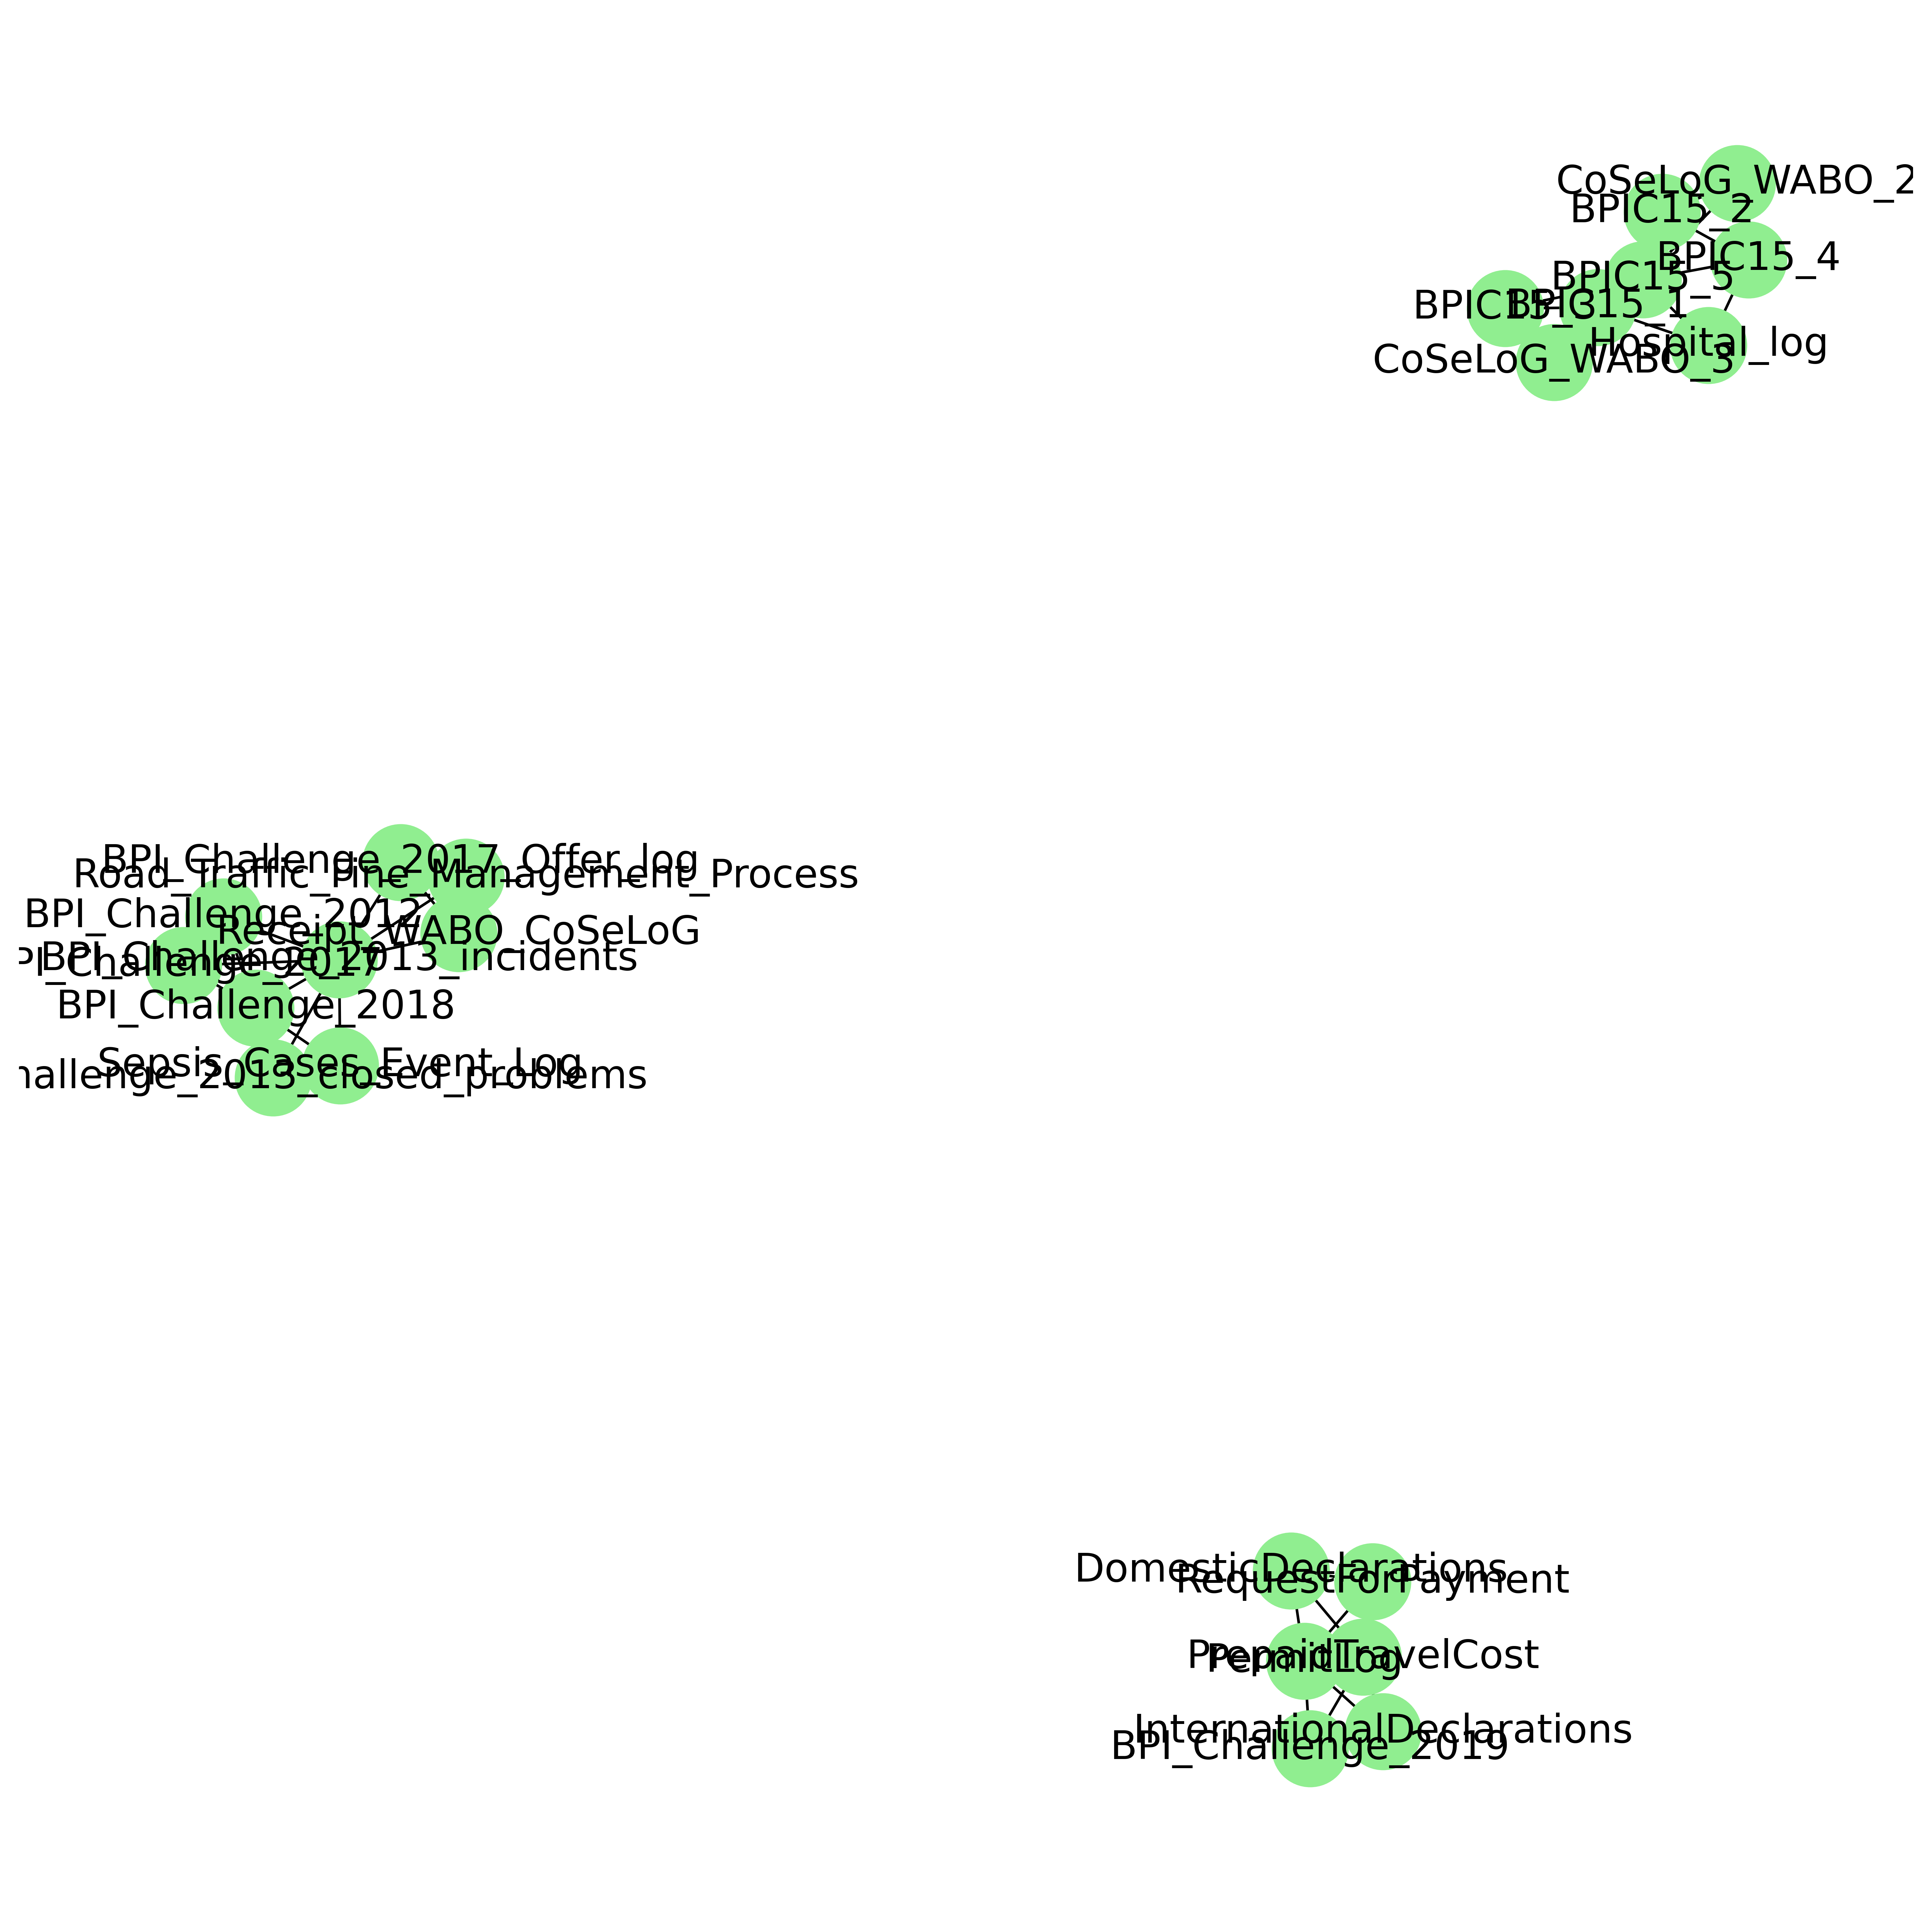

In [58]:
links = features_similarity.stack().reset_index()
#links.index(dmf['log'])
links.columns = ['var1', 'var2', 'value']
filtered_features = pd.DataFrame()
for log in logs:
    filtered_features = pd.concat([filtered_features,links[links['var1']==log].nsmallest(4, 'value')], ignore_index=True)
 
filtered_features=filtered_features.loc[(filtered_features['var1'] != filtered_features['var2'])]
G=nx.from_pandas_edgelist(filtered_features, 'var1', 'var2', edge_attr='value')
 
fig = plt.figure(1, figsize=(10, 10), dpi=600)
# Plot the network:
nx.draw(G, with_labels=True, node_color='lightgreen', node_size=800, edge_color='black', linewidths=1, font_size=15)


In [51]:
filtered_features.sort_values('value')

,var1,var2,value
89,BPI_Challenge_2017,BPI_Challenge_2012,0.000021
37,BPI_Challenge_2012,BPI_Challenge_2017,0.000021
53,Road_Traffic_Fine_Management_Process,BPI_Challenge_2017_Offer_log,0.000095
57,BPI_Challenge_2017_Offer_log,Road_Traffic_Fine_Management_Process,0.000095
1,BPIC15_2,CoSeLoG_WABO_2,0.000130
...,...,...,...
18,BPI_Challenge_2019,PermitLog,0.048553
19,BPI_Challenge_2019,PrepaidTravelCost,0.062365
41,Hospital_log,BPIC15_4,0.155571
42,Hospital_log,BPIC15_5,0.158444


### Extracted features value distribution in benchmark datasets

23 ['BPIC15_2' 'BPI_Challenge_2018' 'Receipt_WABO_CoSeLoG' 'BPIC15_3'
 'BPI_Challenge_2019' 'RequestForPayment' 'PrepaidTravelCost'
 'DomesticDeclarations' 'BPIC15_4' 'BPI_Challenge_2012' 'Hospital_log'
 'BPIC15_5' 'CoSeLoG_WABO_2' 'Road_Traffic_Fine_Management_Process'
 'BPI_Challenge_2017_Offer_log' 'Sepsis_Cases_Event_Log' 'CoSeLoG_WABO_3'
 'BPI_Challenge_2013_closed_problems' 'BPI_Challenge_2013_incidents'
 'PermitLog' 'BPIC15_1' 'InternationalDeclarations' 'BPI_Challenge_2017']


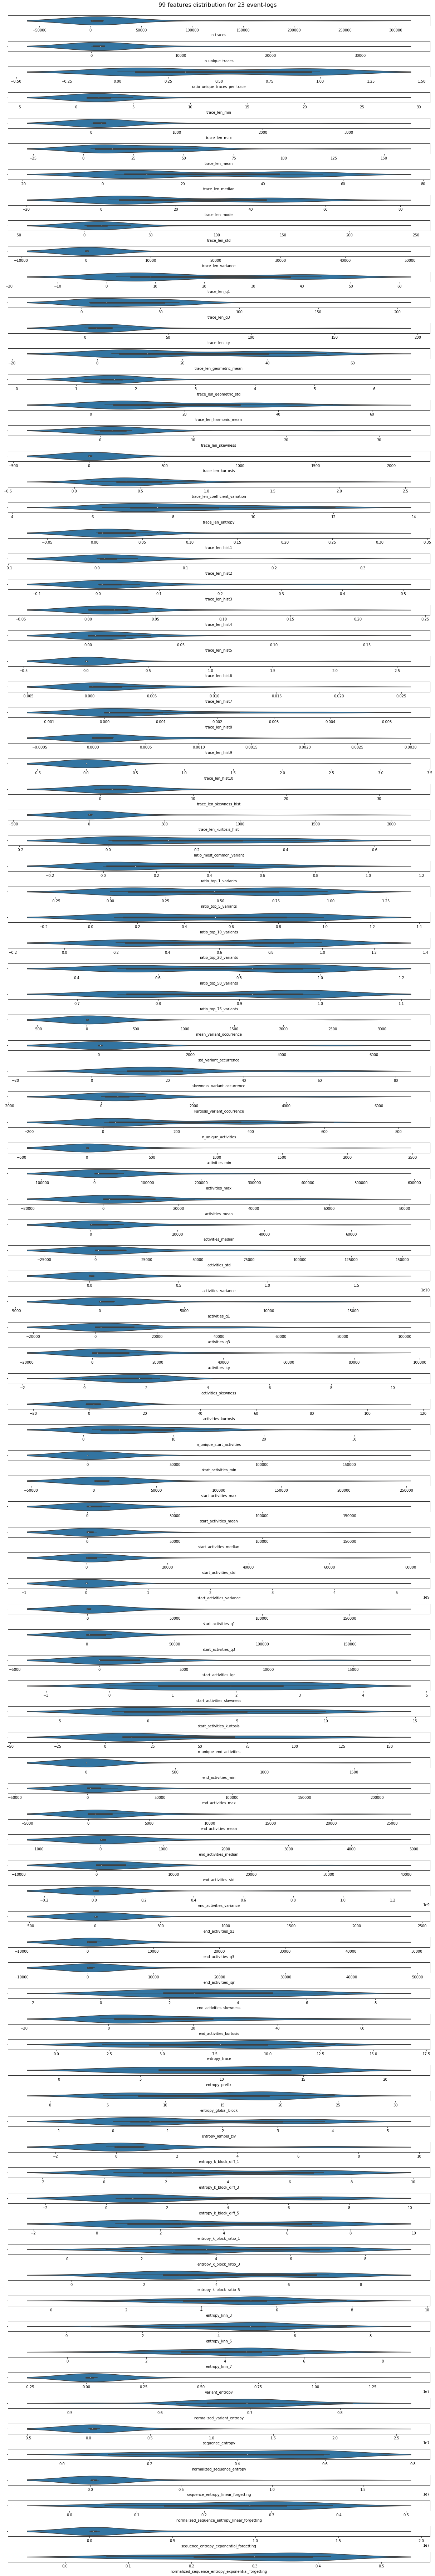

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

print(len(benchmark_features), benchmark_features['log'].unique())

columns = benchmark_features.columns[3:]
dmf1=benchmark_features.select_dtypes(exclude=['object'])

fig, axes = plt.subplots(len(dmf1.columns),1, figsize=(17,len(dmf1.columns)))
for i, ax in enumerate(axes):
        sns.violinplot(data=benchmark_features, x=dmf1.columns[i], ax=ax)
fig.suptitle(f"{len(columns)} features distribution for {len(benchmark_features)} event-logs", fontsize=16, y=1)
fig.tight_layout()

In [14]:
import numpy as np


In [111]:
corr_mtf = dmf1.corr()
corr_mtf

,n_traces,n_unique_traces,ratio_unique_traces_per_trace,trace_len_min,trace_len_max,trace_len_mean,trace_len_median,trace_len_mode,trace_len_std,trace_len_variance,...,entropy_lempel_ziv,entropy_k_block_diff_1,entropy_k_block_diff_3,entropy_k_block_diff_5,entropy_k_block_ratio_1,entropy_k_block_ratio_3,entropy_k_block_ratio_5,entropy_knn_3,entropy_knn_5,entropy_knn_7
n_traces,1.000000,0.343054,-0.375786,0.041747,0.222892,-0.254258,-0.297455,-0.253803,-0.094783,-0.090468,...,-0.350127,-0.186201,-0.331614,-0.280114,-0.395000,-0.276415,-0.351484,0.187842,0.196588,0.210216
n_unique_traces,0.343054,1.000000,0.041249,0.893138,0.756244,0.173868,0.226562,0.229525,0.067253,-0.048826,...,-0.154790,-0.176983,-0.221694,-0.254623,-0.288138,-0.118882,-0.308444,0.652709,0.660813,0.672586
ratio_unique_traces_per_trace,-0.375786,0.041249,1.000000,0.142749,0.177368,0.735545,0.916115,0.818907,0.347332,0.215091,...,0.956493,0.374178,0.780828,0.776143,0.811224,0.861102,0.777367,0.542142,0.527041,0.517917
trace_len_min,0.041747,0.893138,0.142749,1.000000,0.720430,0.216273,0.311979,0.338213,0.037802,-0.074177,...,-0.073752,-0.177936,-0.114173,-0.190564,-0.147801,-0.045474,-0.185101,0.493910,0.498883,0.508995
trace_len_max,0.222892,0.756244,0.177368,0.720430,1.000000,0.551055,0.381955,0.152400,0.573555,0.483774,...,0.049116,-0.168567,-0.161179,-0.205217,-0.171817,0.019424,-0.204285,0.546826,0.547117,0.552859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
entropy_k_block_ratio_3,-0.276415,-0.118882,0.861102,-0.045474,0.019424,0.662359,0.855525,0.801924,0.282172,0.182900,...,0.913979,0.413791,0.886059,0.822976,0.916695,1.000000,0.957293,0.426528,0.415111,0.407254
entropy_k_block_ratio_5,-0.351484,-0.308444,0.777367,-0.185101,-0.204285,0.478086,0.736494,0.786614,0.081551,0.010822,...,0.875153,0.465396,0.929262,0.876058,0.960882,0.957293,1.000000,0.218921,0.207166,0.197432
entropy_knn_3,0.187842,0.652709,0.542142,0.493910,0.546826,0.505772,0.582418,0.485901,0.289507,0.137123,...,0.414329,-0.019703,0.235076,0.179304,0.219377,0.426528,0.218921,1.000000,0.999711,0.999249
entropy_knn_5,0.196588,0.660813,0.527041,0.498883,0.547117,0.493964,0.569829,0.476082,0.281666,0.130325,...,0.397484,-0.031244,0.220259,0.163976,0.203904,0.415111,0.207166,0.999711,1.000000,0.999613


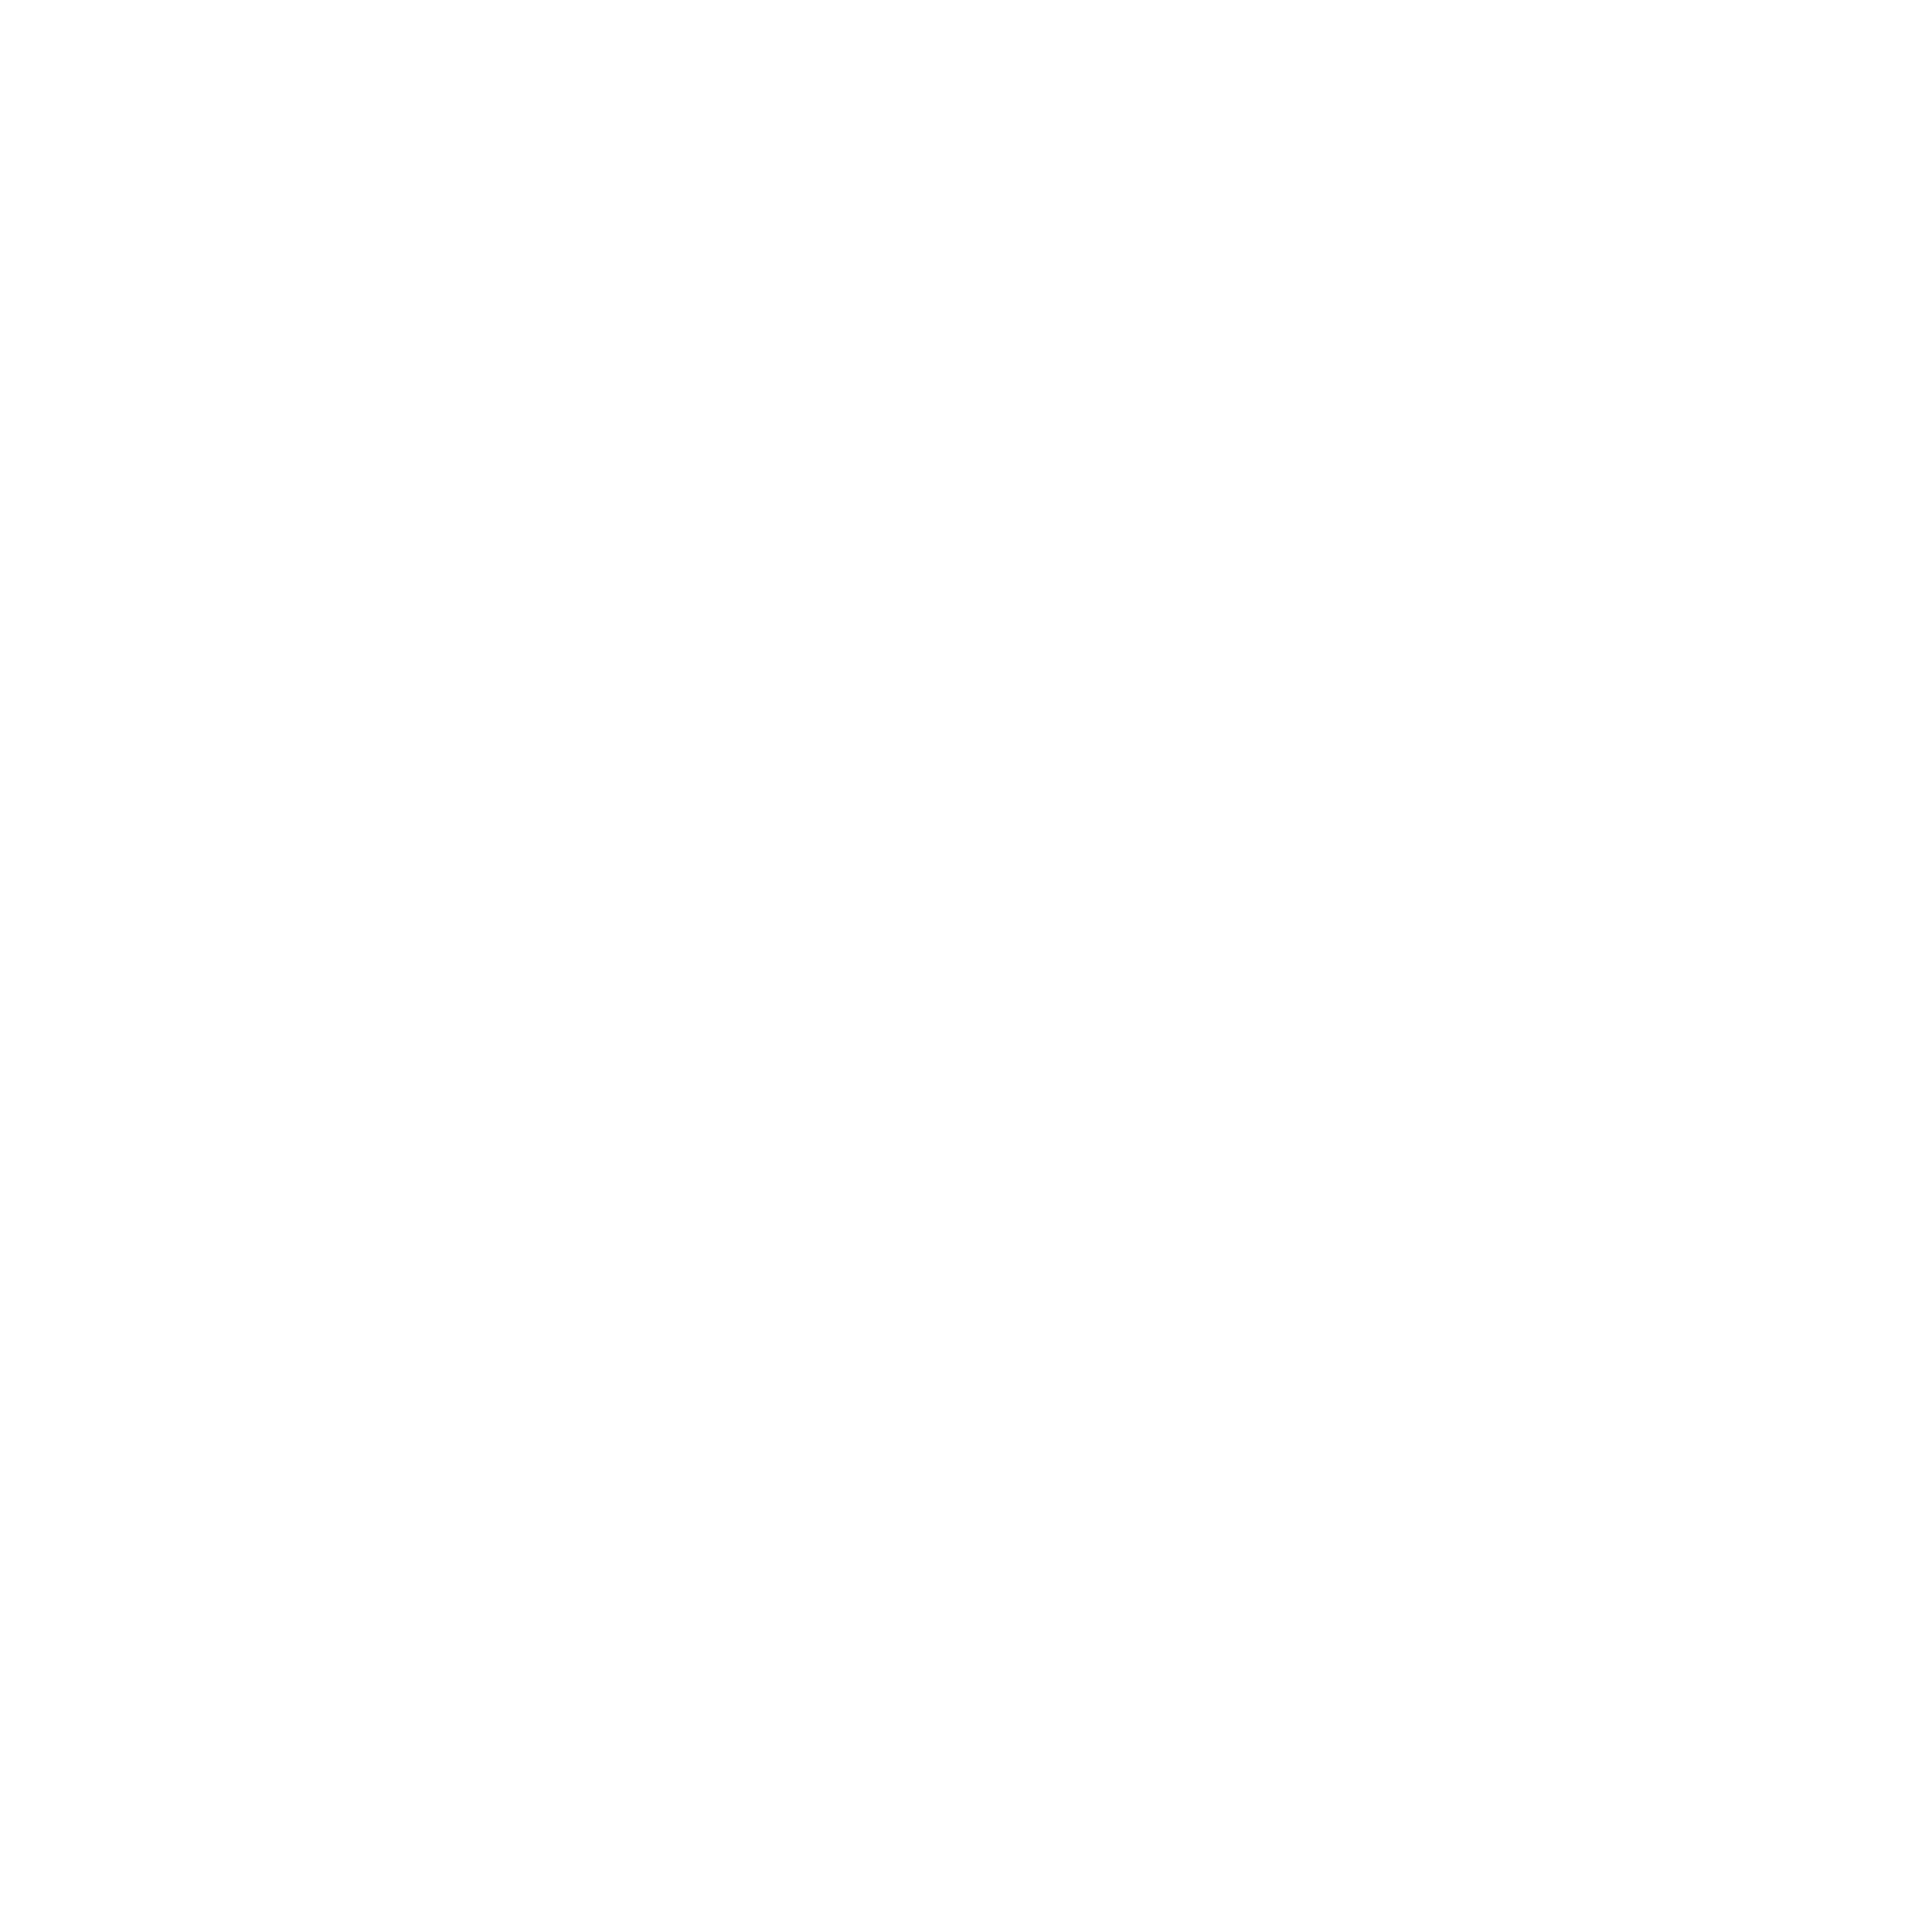

In [243]:
links = corr_mtf.stack().reset_index()
links.columns = ['var1', 'var2', 'value']
corr_mtf = pd.DataFrame()
for log in logs:
    corr_mtf = pd.concat([corr_mtf,links[links['var1']==log].nlargest(4, 'value')], ignore_index=True)
 
corr_mtf=corr_mtf.loc[(corr_mtf['var1'] != corr_mtf['var2'])]
G=nx.from_pandas_edgelist(corr_mtf, 'var1', 'var2', edge_attr='value')
 
fig = plt.figure(1, figsize=(10, 10), dpi=600)
# Plot the network:
nx.draw(G, with_labels=True, node_color='lightgreen', node_size=800, edge_color='black', linewidths=1, font_size=15)


links.columns = ['var1', 'var2', 'value']
links_filtered=links.loc[ (links['value'] > 0.8) & (links['var1'] != links['var2']) ]
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
fig = plt.figure(1, figsize=(15, 15), dpi=60)
# Plot the network:
nx.draw(G, with_labels=True, node_color='lightgreen', node_size=600, edge_color='black', linewidths=1, font_size=15)

In [20]:
df = pd.read_csv("../tag/data/real_event_logs.csv", index_col=None)
df = df.set_index('log')
df.head()

,Unnamed: 0,n_traces,n_unique_traces,ratio_unique_traces_per_trace,trace_len_min,trace_len_max,trace_len_mean,trace_len_median,trace_len_mode,trace_len_std,...,entropy_k_block_diff_1,entropy_k_block_diff_3,entropy_k_block_diff_5,entropy_k_block_ratio_1,entropy_k_block_ratio_3,entropy_k_block_ratio_5,entropy_knn_3,entropy_knn_5,entropy_knn_7,Log Nature
log,,,,,,,,,,,,,,,,,,,,,
BPIC15_2,0,832,828,0.995192,1,132,53.310096,54.0,61,19.894977,...,7.105,7.105,7.105,7.105,7.105,7.105,5.545,5.039,4.721,Real
BPI_Challenge_2018,1,43809,28457,0.649570,24,2973,57.391541,49.0,49,34.872131,...,-0.010,1.855,0.511,1.403,3.572,2.001,7.849,7.371,7.067,Real
Receipt_WABO_CoSeLoG,2,1434,116,0.080893,1,25,5.981172,6.0,6,2.166129,...,2.672,2.966,0.804,1.484,2.966,2.966,3.260,2.845,2.584,Real
BPIC15_3,3,1409,1349,0.957417,3,124,42.356991,42.0,44,16.138406,...,-0.007,6.780,6.780,6.780,6.780,6.780,5.701,5.212,4.900,Real
BPI_Challenge_2019,4,251734,11973,0.047562,1,990,6.339720,5.0,5,13.057417,...,-0.041,1.530,0.840,0.620,3.244,1.913,7.333,6.882,6.601,Real


In [27]:
import json
path = "../tag/output/features/real_event_logs_complexities/"
combined_features = pd.DataFrame()

file_names = tqdm(sort_files(os.listdir(path)))

combined_results = []
for file in file_names:
    f = open(path+file, 'r')
    combined_results.append(json.load(f))

complexities = pd.DataFrame(combined_results)
complexities = complexities.set_index('log')

result = pd.concat([df, complexities], axis=1, join="inner")
result = result.drop(['Unnamed: 0'], axis=1)
#result.to_csv("../tag/data/benchmark_features.csv")

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 3358.13it/s]
